In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv('Movie.csv')

In [14]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
495,"""American Nightmare"" officially tied, opinion,...",negative
496,"First off, say loved book Animal Farm. read 9t...",negative
497,movie extremely boring. laughed times. decided...,negative
498,"disgusted movie. graphic sex scenes, ruined im...",negative


In [15]:
data.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive


In [16]:
data['sentiment'].value_counts()#value_counts() will show how many times each of these sentiments appears in the dataset.

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [17]:
#wordcloud

data.dropna(inplace=True)#used to remove rows/col containing missing values directly from the datasets

In [18]:

data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
495,"""American Nightmare"" officially tied, opinion,...",negative
496,"First off, say loved book Animal Farm. read 9t...",negative
497,movie extremely boring. laughed times. decided...,negative
498,"disgusted movie. graphic sex scenes, ruined im...",negative


In [19]:
def clean_review(review):#This line attempts to remove stopwords and join the remaining words.
    str = ''.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [20]:
data['review'] = data['review'].apply(clean_review)

In [21]:
#creating a wordcloud
from wordcloud import WordCloud

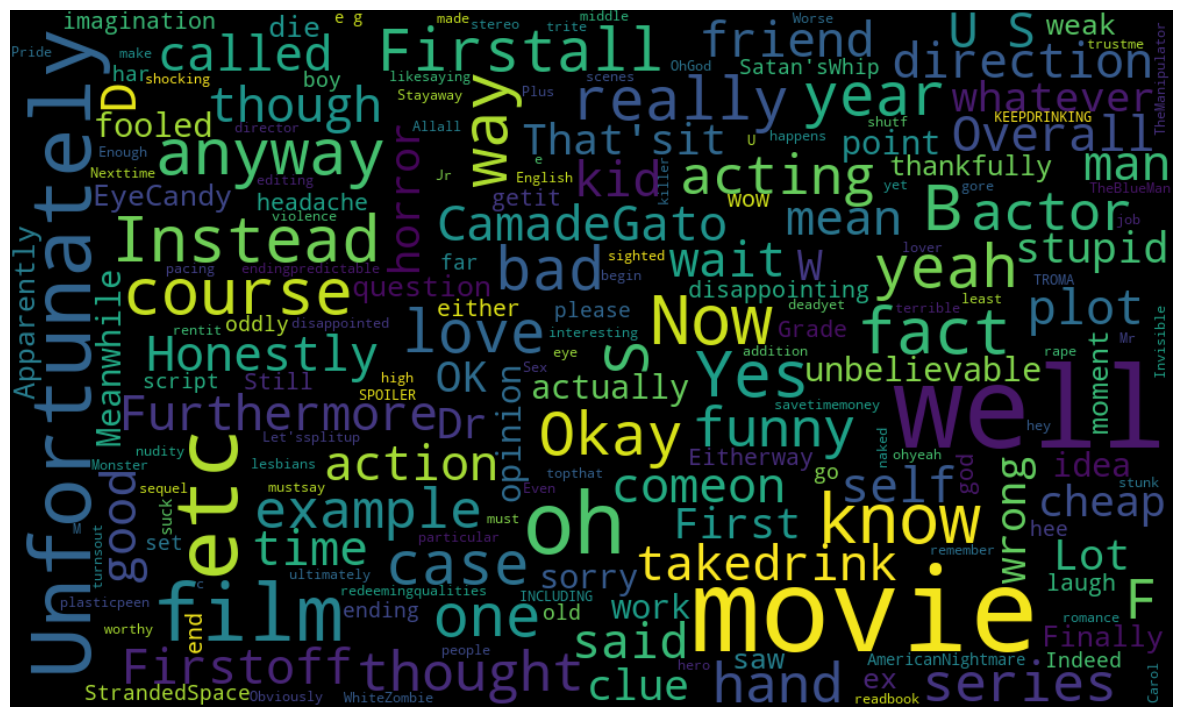

In [22]:
#draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'].isin(['negative', 'neg'])].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')


plt.show()

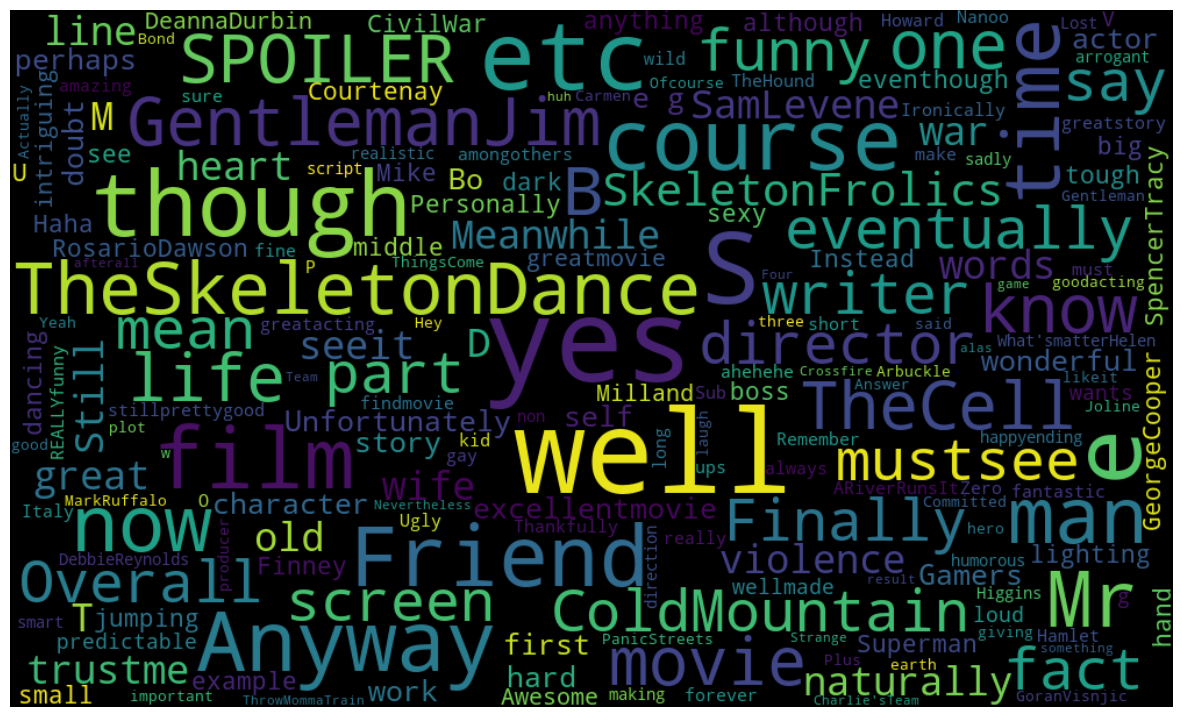

In [23]:
reviews = ' '.join(word for word in data['review'][data['sentiment'].isin(['positive', 'pos'])].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create TF-IDF object
cv = TfidfVectorizer(max_features=2500)

In [25]:
reviews = cv.fit_transform(data['review']).toarray()

In [26]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [27]:
data['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
reviews_train,review_test, sent_train, sent_test= train_test_split(reviews, data['sentiment'],test_size=0.2)

In [32]:
model.fit(reviews_train,sent_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
predict =model.predict(review_test)

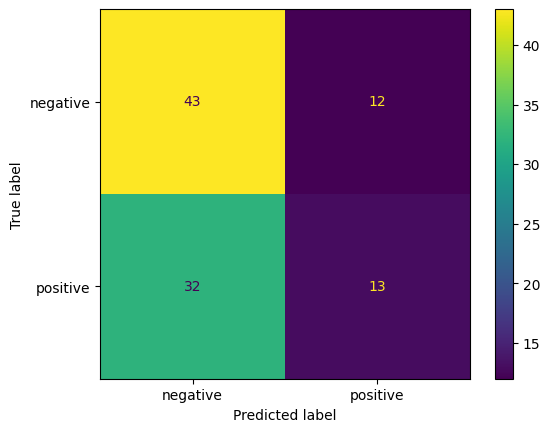

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [35]:
import pickle as pk

In [36]:
pk.dump(model,open('model.pkl','wb'))

In [37]:
pk.dump(cv,open('scaler.pkl','wb'))